<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# EQUATION DE DIFFUSIVITE: SOLUTION DE THEIS ET COOPER-JACOB APPLICABLES AUX ESSAIS DE NAPPE

# Approche théorique préalable



Préambule: ce cours est adapté du cours "Transient Groundwater Flow Short Course (Module 3 at UNESCO-IHE, Delft, Netherlands)" construit par Theo Olsthoorn, 08-Jan-2018

## Equation de diffusivité

$$\frac{\partial^2 h}{\partial r^2} + \frac{1}{r}\frac{\partial h}{\partial r} = \frac{S}{Kb} \times \frac{\partial h}{\partial t}$$

## Solution de Theis 

### Hypothèses:
- Aquifère reposant sur un couche imperméable
- Formations géologiques homogènes, isotropes, horizontales et d'extension horizontale infinie
- Surface piézométrique initialement horizontale
- Loi de Darcy valide
- Puits parfait et de diamètre négligeable
- Eau provient uniquement de la décompression de l'aquifère

### Equation de Theis 
En réalisation le changement de variable suivant:
$$
	u = \frac{r^2S}{4Kbt}
$$

La résolution de l'équation de diffusivité pour les hypothèses (conditions limites) précédentes amène la solution de Theis

$$
    s = \frac{Q}{4 \pi T} \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

### Fonction de Theis
Cette résolution introduit la fonction de Theis  $W(u)$ définie par analogie à l'équation précédente:

$$
	W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

Cette fonction peut être rapprochée de la fonction Exponentielle Intégrale $E_i$ connue en mathématiques:

$$
	E_i = \int_{-\infty}^{u} {\frac{e^{y}}{y}} \mathrm{d}y
$$
Une fonction alternative $E_1$ peut être définie, de la même famille que la fonction exponentielle intégrale $E_i$ telle que:

$$
    E_1(x) = -E_i(-x) = \int_{x}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = W(u)
$$


### Calcul de W(u) à partir des fonctionnalités de Python

La fonction exponetielle intégrale est implémentée dans la bibliothèque "Scipy.Special" sous la forme "exp1".
On peut directement calculer la valeur $W(u$) telle que:
$$
    W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = exp1(u)
$$  

### Calcul de W(u) à partir d'une intégration numérique

Comme toute fonction mathématique continue et dérivable, la fonction de Theis peut faire l'objet d'une intégration numérique afin d'estimer la valeur de $W(u)$ pour toute valeur de borne particulière $u$.

Afin de réaliser cette intégration, il est nécessaire de réécrire la forme continue de la fonction de Theis à l'aide d'une formulation discontinue:
$$
    W(u) = \intop_u^{-\infty} \frac {e^{-y}} y dy \approx \sum_0^N \frac {e^{-y_i}} {y_i} \Delta y_i
$$

où $y_0 = u_0$ et $N$ est un entier suffisamment grand.

Le module numpy permet de réaliser simplement une intégration numérique, en définissant préalablement la fonction à intégrer comme une fonction Python.

In [6]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

u = 0.8  # choisir une valeur de u

def Wint(u):
    '''Renvoie la valeur de la fonction de Theis obtenue par intégration numérique'''
    LOG10INF = 2 # sufficient as exp(-100) is in the order of 1e-50
    y = np.logspace(np.log10(u), LOG10INF, num=1000)
    arg = np.exp(-y) / y
    dy = np.diff(y)
    w = np.sum(0.5 * (arg[:-1] + arg[1:]) * dy)
    return w

print('exp1(u)    =', sp.exp1(u),', module scipy.special')
print('Wint(u))   =', Wint(u),', intégration de la fonction de Theis')

exp1(u)    = 0.3105965785455431 , module scipy.special
Wint(u))   = 0.31060111151300185 , intégration de la fonction de Theis


### Représentation graphique et courbe de Theis

La courbe de Theis correspond à une abaque exprimant $W(u)$ pour différentes valeurs de $u$. Cette courbe permet d'éviter à avoir à calculer la fonction intégrale. Cette courbe était très utilisée en hydrogéologie lorsque les outils de calculs étaient moins accessibles qu'aujourd'hui.

On utilise deux modes de représentation: $W(u) = f(u)$ et $W(u) = f(1/u)$

La représentation $W(u) = f(1/u)$ est souvent préférée car elle permet une comparaison directe avec les mesures réalisées sur le terrain lors des essais de nappe.

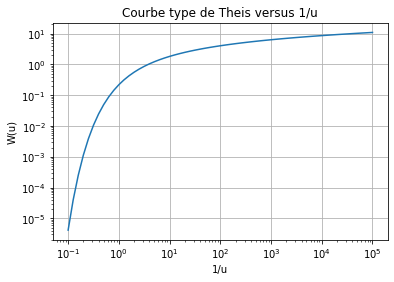

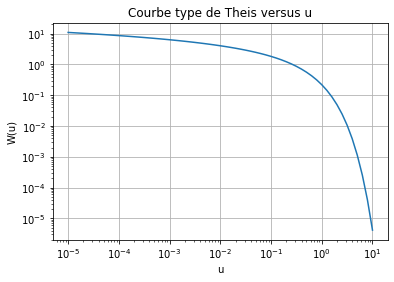

In [7]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# calcul de u avec echantillonnage log10
u = np.logspace(-5, 1, 61)

# paramétrage de la figure W(u) = f(1/u)
plt.title('Courbe type de Theis versus 1/u')
plt.xlabel('1/u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(1/u, sp.exp1(u)) # plot well function versus 1/u

plt.show()

# paramétrage de la figure W(u) = f(u)
plt.title('Courbe type de Theis versus u')
plt.xlabel('u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(u, sp.exp1(u)) # plot well function versus u

plt.show()

Lorsqu'on ne dispose pas de moyen de calcul, il existe des tableaux dans tous les livres d'hydrogéologie permettant de trouver les valeurs de $W(u)$ pour $u$, selon le principe des tables de lois statistiques.
Le tableau suivant est tiré de Kruseman et de Ridder (date)
<figure>
  <IMG SRC="ENS2_Hydrodyn_8.png" WIDTH=1250 ALIGN="right">
</figure>

In [11]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

U = np.logspace(-5, 1, 20)

print("{:>10s}  {:>10s}".format('u   ', 'W(u)'))

for u in U:
    print("{0:10.2e}   {1:10.3e}".format(u, sp.exp1(u)))


      u           W(u)
  1.00e-05    1.094e+01
  2.07e-05    1.021e+01
  4.28e-05    9.481e+00
  8.86e-05    8.754e+00
  1.83e-04    8.027e+00
  3.79e-04    7.300e+00
  7.85e-04    6.574e+00
  1.62e-03    5.847e+00
  3.36e-03    5.122e+00
  6.95e-03    4.398e+00
  1.44e-02    3.679e+00
  2.98e-02    2.967e+00
  6.16e-02    2.271e+00
  1.27e-01    1.606e+00
  2.64e-01    1.003e+00
  5.46e-01    5.081e-01
  1.13e+00    1.775e-01
  2.34e+00    3.098e-02
  4.83e+00    1.398e-03
  1.00e+01    4.157e-06


### Expression de la fonction de Theis à partir d'un développement en série de Taylor


La fonction de Theis peut également être exprimée selon un développement en série de Taylor. On obtient une formulation en série infinie de puissance:

$$
    W(u) = -\gamma - ln(u) - \sum_{n=1}^{\infty} {\frac{(-1)^n u^n}{n(n)!}}
$$

soit sous la forme développée

$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!} + - \frac{u^5}{5.5!} - \cdots
$$

avec $\gamma = 0.5773$ (nombre d'Euler).

Cette expression corresponds à une série infinie convergente. $W(u)$ peut être approché en tronquant la série infinie après un nombre de terme suffisant

Par exemple, en tronquant la série au 4ème terme:
$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!}
$$


In [4]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

U = 4.0 * 10** -np.arange(11.)   # generates values 4, 4e-1, 4e-2 .. 4e-10
print("{:>10s} {:>10s}".format('u   ', 'W(u) série tronquée  ', 'W(u) Theis'))
for u in U:
    W = sp.exp1(u)
    w = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
    print("{:.3e} {:.3e} {:.3e}".format(u, w, W))

      u    W(u) série tronquée  
4.000e+00 -1.075e+00 3.779e-03
4.000e-01 7.024e-01 7.024e-01
4.000e-02 2.681e+00 2.681e+00
4.000e-03 4.948e+00 4.948e+00
4.000e-04 7.247e+00 7.247e+00
4.000e-05 9.549e+00 9.549e+00
4.000e-06 1.185e+01 1.185e+01
4.000e-07 1.415e+01 1.415e+01
4.000e-08 1.646e+01 1.646e+01
4.000e-09 1.876e+01 1.876e+01
4.000e-10 2.106e+01 2.106e+01


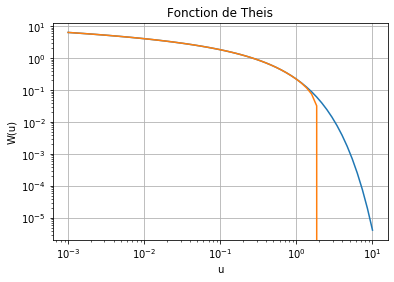

In [15]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# calcul de u avec echantillonnage log10
u = np.logspace(-3, 1, 61)
W = sp.exp1(u)
w = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
  
# paramétrage de la figure W(u) = f(u)
plt.title('Fonction de Theis')
plt.xlabel('u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(u, W) 
plt.plot(u, w) 
plt.show()



La solution tronquée (ici à l'ordre 4) diverge de la solution exacte de Theis pour les fortes valeurs de u.

Il est interessant d'étudier cette divergence en fonction de l'ordre de troncature utilisé pour simplifier le développement de Taylor


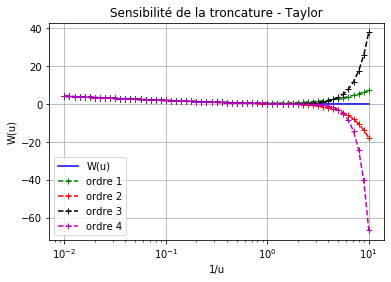

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

u = np.logspace(-2, 1, 61)
W = sp.exp1(u)
w4 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
w3 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))
w2 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2))
w1 = -0.5772 -np.log(u) + u

import matplotlib.pylab as plt

fig1= plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='1/u', ylabel='W(u)', title='Sensibilité de la troncature - Taylor', xscale='log')
ax1.grid(True)
ax1.plot(u, W, 'b', label='W(u)')
#ax1.plot(u, W1(u), 'rx', label='integal') # works only for scalars
ax1.plot(u, w1, 'g+--', label='ordre 1')
ax1.plot(u, w2, 'r+--', label='ordre 2')
ax1.plot(u, w3, 'k+--', label='ordre 3')
ax1.plot(u, w4, 'm+--', label='ordre 4')
ax1.legend(loc='best')

plt.show()

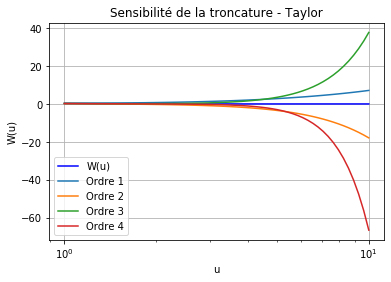

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
#import matplotlib.pylab as plt

u = np.logspace(0, 1, 61)
W = sp.exp1(u)
w4 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
w3 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))
w2 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2))
w1 = -0.5772 -np.log(u) + u

taylor = (W,w1,w2,w3,w4)

I=np.arange(1,len(taylor))

fig1= plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set(xlabel= 'u', ylabel='W(u)', title='Sensibilité de la troncature - Taylor', xscale='log')
ax1.grid(True)
ax1.plot(u, taylor[0], 'b', label='W(u)')
for i in I:
    ax1.plot(u, taylor[i], label='Ordre %s' % i)
ax1.legend(loc='best')

plt.show()

La précision de l'approximation de la fonction de Theis par le développement en série de Taylor est liée à l'ordre de la troncature. On peut illustrer cette observation en introduisant le calcul d'un écart normalisé entre la fonction de Theis et la troncature de Taylor:

$$
\Delta = 1 - \frac{W_{taylor}}{W(u)}
$$




In [3]:
import numpy as np
import scipy.special as sp


U = np.logspace(-2, 0, 21)
W = lambda u : sp.exp1(u)
w4 = lambda u : -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
w1 = lambda u : -0.5772 -np.log(u) + u

print("{:>12s}  {:>12s}   {:>12s}   {:>12s}   {:>12s}   {:>12s}".format('u','W(u)','W4(u)','1-W4(u)/W(u)','W1(u)','1-W1(u)/W(u)'))
for u in U:
    print("{:12.3g}  {:12.3g}  {:12.3g}  {:12.1%}  {:12.3g}  {:12.1%}".format(u, W(u), w4(u), 1-w4(u)/W(u), w1(u), 1-w1(u)/W(u)))


           u          W(u)          W4(u)   1-W4(u)/W(u)          W1(u)   1-W1(u)/W(u)
        0.01          4.04          4.04         -0.0%          4.04         -0.0%
      0.0126          3.81          3.81         -0.0%          3.81         -0.0%
      0.0158          3.58          3.58         -0.0%          3.58         -0.0%
        0.02          3.36          3.36         -0.0%          3.36         -0.0%
      0.0251          3.13          3.13         -0.0%          3.13         -0.0%
      0.0316          2.91          2.91         -0.0%          2.91         -0.0%
      0.0398          2.69          2.69         -0.0%          2.69         -0.0%
      0.0501          2.47          2.47         -0.0%          2.47         -0.0%
      0.0631          2.25          2.25         -0.0%          2.25         -0.0%
      0.0794          2.03          2.03         -0.0%          2.04         -0.1%
         0.1          1.82          1.82         -0.0%          1.83         -0.1%


## Approximation de Cooper-Jacob 

On a vu précemment que la fonction de Theis pouvait s'exprimer à partir d'un développement en série de Taylor sous la forme:

$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!} + - \frac{u^5}{5.5!} - \cdots
$$

avec $\gamma = 0.5773$ (nombre d'Euler).

L'étude de ce développement que nous avons réalisé a mis en évidence la possibilité tronquer la série infinie, pour obtenir une solution approchée de la fonction de Theis.

En 1946, Jacob puis Jacob et Cooper (1951) proposent l'approximation suivante pour la fonction de Theis:

$$
    W(u) \approx -\gamma - ln(u) 
$$

sous condition que $u$ soit suffisamment faible. En pratique:

$$
u < 1.10^{-2}
$$

Puisque $u = \frac{r^2S}{4Tt}$ on peut réécrire:

$$
    W(u) \approx -\gamma - ln\left({\frac{r^2S}{4Tt}}\right) \approx -\gamma + ln\left({\frac{4Tt}{r^2S}}\right) \approx ln\left({\frac{4Tt}{e^{\gamma}r^2S}}\right) \approx ln\left({\frac{2.25Tt}{r^2S}}\right)
$$

La formulation de Cooper-Jacob pour la solution de Theis est :

$$
s = \frac{Q}{4 \pi T} ln\left({\frac{2.25Tt}{r^2S}}\right)
$$

ou en exprimant le logarithme en base 10:

$$
s = \frac{2.3Q}{4 \pi T} log\left({\frac{2.25Tt}{r^2S}}\right)
$$

Cette formulation ne reste applicable que pour $ \frac{r^2S}{4Tt} < 1.10^{-2}$



## Estimation de l'impact de pompages



### Puits de pompage unique

Un puits parfait exploite une nappe captive d'épaisseur constante $b$. La conductivité hydraulique $K$ est supposée constante. Le puits est exploité au débit constant $Q$.

*Calculer le rabattement au bout d'une durée d'exploitation $t$ à une distance d'observation $r$ du puits d'exploitation.*
 - $K = 3.10^{-4} \ m.s^{-1}$
 - $S = 2.10^{-4}$
 - $b =25 \ m$
 - $r = 42 \ m$
 - $Q = 135 \ m^3.h^{-1}$
 - $t = 5 \ h$-  $r = 42 \ m$



La solution analytique de Theis est:
$$	s = \frac{Q}{4 \pi T} W(u) = \frac{Q}{4 \pi T} W \left( {\frac{r^2S}{4Tt}} \right)
$$	
Il faut dans un premier temps calculer le terme $u$ puits à l'aide de l'abaque, du tableau ou d'un calculateur, calculer le terme de Theis $W(u)$. Il faut rester cohérent avec les unités (SI par défaut).

On a donc:
$$
u = {\frac{r^2S}{4Tt}}
$$
Et pour le calcul du rabattement:

$$
s = \frac{Q}{4 \pi T} W(u)
$$


In [19]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 3e-4 # m/s
S = 2e-4
b = 25 #m
r = 42 #m
Q = 135 # m3/heure
t = 5 #heure

u = (S * r ** 2)/(4 * K * b * t*3600)
s = (Q/3600)/(4 * 3.1415 * K * b)* sp.exp1(u)

print('La variable de Theis est u = {:.2e}'.format(u))
print('Le rabattement calculé au puits est s = {:.3g} m'.format(s))


La variable de Theis est u = 6.53e-04
Le rabattement calculé au puits est s = 2.69 m


Le rabattement peut être calculé à partir de la solution de Cooper-Jacob:

$$
s = \frac{2.3Q}{4 \pi T} Log\left({\frac{2.25Tt}{r^2S}}\right)
$$

Il faut au préalable s'assurer de la validité de la solution en vérifiant $ \frac{r^2S}{4Tt} < 1.10^{-2}$


In [25]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 3e-4 # m/s
S = 2e-4
b = 25 #m
r = 42 #m
Q = 135 # m3/heure
t = 5 #heure

u = (S * r ** 2)/(4 * K * b * t*3600)

print('La variable de Theis est u = {:.2e}'.format(u), 'La condition u< 0.01 est vérifiée')

sj = (2.3*Q/3600)/(4 * 3.1415 * K * b)*np.log10((2.25*K*b*t*3600)/(S * (r ** 2)))

print('Le rabattement calculé au puits est s = {:.3g} m'.format(sj))


La variable de Theis est u = 6.53e-04 La condition u< 0.01 est vérifiée
Le rabattement calculé au puits est s = 2.69 m


### Puits de pompage multiples


### Principe de superposition

Le principe de superposition pose que pour tout système linéaire, la réponse causée par deux ou plusieurs stimuli est la somme des réponses qui auraient été engendrées par chaque stimulus individuellement. Ainsi si la stimulation A produit la réponse $X$ et si la stimulation $B$ produit la réponse $Y$, alors la stimulation $(A + B)$ générera la réponse $(X + Y)$.
Une fonction $F(x)$ qui répond au principe de superposition est appelée une fonction linéaire.

La superposition peut être définie pour la fonction par 2 propriétés: additivité et homogénéité

- Additivité

$$
F(x+y) = F(x) + F(y)
$$

- Homogénéité

$$
F(ax) = aF(x)
$$

L'équation de diffusivité pour un système captif homogène est une équation linéaire. On peut donc lui appliquer le principe de superposition. On peut également appliquer ce principe à toutes les équations qui correspondent à des solutions particulières de cette équation mère.
A ce titre, le principe de superposition peut être utilisé pour l'équation de Theis.

L'application du principe de superposition à l'équation de diffusivité trouve de nombreuses utilisations en hydrogéologie pratique:
- estimation de l'influence de pompage à débit variable;
- estimation de l'influence de pompages simultanés;
- étude de l'arrêt d'un pompage;
- étude de l'influence de limites spatiales de l'aquifère sur l'évolution de la piézométrie lors d'un pompage;
- etc ...

#### Etude d'un champ captant

Un champ captant est un dispositif d'exploitation d'une nappe constitué par plusieurs puits de pompage exploités simulanément ou de manière asynchrone. L'étude de l'impact sur la nappe peut être abordé à partir du principe de superposition et de la solution de Theis.

<figure>
  <IMG SRC="theis4.png" WIDTH=275 ALIGN="center">
</figure>
    
On considère $n$ puits exploités aux débits $Q_1,\ Q_2,\ ... ,\ Q_n$. Le rabattement total $s_T$ à un point d'observation $P$ est exprimé dans les hypothèses de résolution de Theis par:
    
$$
s_T = \sum\limits_{i=1}^n {\frac{Q_i}{4 \pi T}W \left({\frac{r_i^2S}{4Tt) }} \right)}
$$

Le principe de superposition peut également être appliqué à la solution de Cooper-Jacob, à condition quer le critère pour $u$ soit respecté.


**Application:**
    
On considère un doublet de puits exploitant une nappe captive. Les caractéristiques du système aquifère et du dispositif d'exploitation sont les suivantes:

- Transmissivité de l'aquifère: kD = 1e-3 m2/s
- Coefficient d'emmagasinnement: S = 1e-4
- coordonnées du forage f1 (repère cartésien local): f1 = (200m, 200m)
- coordonnées du forage f2 (repère cartésien local): f1 = (400m, 400m)
- débit d'exploitation de f1: Q1 = 350 m3/j
- débit d'exploitation de f2: Q2 = 500 m3/j
- durée de pompage: t = 5 heures

*Quel est le rabattement à un piézomètre P(300,350)?*


In [27]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

kD = 1e-3 #(m2/s)
S = 1e-4
xf1 = 200 #0 < (m) < 600
yf1 = 200 #0 < (m) < 600
xf2 = 400 #0 < (m) < 600
yf2 = 400 #0 < (m) < 600
Qf1 = 350 #m3/j
Qf2 = 500 #m3/j
t = 5  # pompage synchrones heure

xp = 300
yp = 350

#impact de f1 sur P
r1 = np.sqrt((xp-xf1) ** 2 + (yp-yf1) ** 2)
u1 = r1**2. * S / (4 * (kD * 86400) * (t / 24))
sp1 = Qf1/(4 * np.pi * (kD * 86400)) * sp.exp1(u1)

#impact de f2 sur P
r2 = np.sqrt((xp-xf2) ** 2 + (yp-yf2) ** 2)
u2 = r2**2. * S / (4 * (kD * 86400) * (t / 24))
sp2 = Qf2/(4 * np.pi * (kD * 86400)) * sp.exp1(u2)

#rabattement total sur P
sp = sp1 + sp2
print('Le rabattement calculé au piézomètre P est s = {:.3g} m'.format(sp))


Le rabattement calculé au piézomètre P est s = 2.44 m


**Création d'une carte d'impact pour 2 puits de pompage**


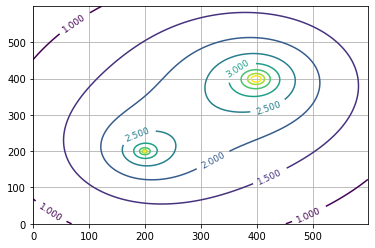

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

kD = 1e-3 #(m2/s)
S = 1e-4
xf1 = 200 #0 < (m) < 600
yf1 = 200 #0 < (m) < 600
xf2 = 400 #0 < (m) < 600
yf2 = 400 #0 < (m) < 600
Qf1 = 350 #m3/j
Qf2 = 500 #m3/j
t = 5  # pompage synchrones heure


x = np.linspace(0,600,600)
y = np.linspace(0,600,600)
X, Y = np.meshgrid(x, y)

r1 = np.sqrt((X-xf1) ** 2 + (Y-yf1) ** 2)
u1 = r1**2. * S / (4 * (kD * 86400) * (t / 24))
s1 = Qf1/(4 * np.pi * (kD * 86400)) * sp.exp1(u1)

r2 = np.sqrt((X-xf2) ** 2 + (Y-yf2) ** 2)
u2 = r2**2. * S / (4 * (kD * 86400) * (t / 24))
s2 = Qf2/(4 * np.pi * (kD * 86400)) * sp.exp1(u2)

level = np.arange(1,5,0.50) #valeur des iso (min,max,delta)
map = plt.contour(s1+s2,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()